In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pyiron_atomistics import Project

2022-11-11 08:39:46,492 - pyiron_log - WARNING - Configuration file may be read by others - check permissions to secure credential information!
/home/menon/miniconda3/envs/pyiron-atom-dev/lib/python3.10/site-packages/paramiko-2.10.3-py3.10.egg/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
/home/menon/miniconda3/envs/pyiron-atom-dev/lib/python3.10/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: NOT-A-GIT-REPOSITORY is an invalid version and will not be supported in a future release
  warnings.warn(


In [3]:
ev_to_j = sc.physical_constants["electron volt-joule relationship"][0]
Av =  sc.physical_constants["Avogadro constant"][0]
A_to_m = 1E-10
kB = sc.physical_constants["Boltzmann constant"][0]

In [53]:
structure.write("a.data", format="vasp")

In [2]:
pr = Project("sp_t1")

In [4]:
structure = pr.create.structure.bulk("Al", cubic=True).repeat(4)

In [5]:
job = pr.create.job.Lammps("job1")

In [6]:
job.structure = structure

In [9]:
job.potential = '2008--Mendelev-M-I--Al--LAMMPS--ipr1'

In [11]:
job.calc_md(temperature=293, pressure=0, n_ionic_steps=10000, initial_temperature=293)

In [12]:
job.run()

The job job1 was saved and received the ID: 347


In [13]:
eq_struct = job.get_structure()

In [19]:
job = pr.create.job.Lammps("job2")
job.structure = eq_struct
job.potential = '2008--Mendelev-M-I--Al--LAMMPS--ipr1'

In [20]:
job.calc_md(temperature=293, pressure=0, n_ionic_steps=100000, initial_temperature=293, n_print=100)

In [21]:
job.run()

The job job2 was saved and received the ID: 348


In [22]:
etotal = job.output.energy_tot

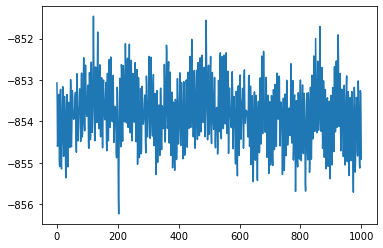

In [24]:
plt.plot(etotal)

In [26]:
emean = np.mean(etotal)

In [27]:
efluct = etotal - np.mean(etotal)

In [28]:
efluctsq = (efluct*ev_to_j)**2

In [29]:
cp = np.mean(efluctsq)/(kB*293*293)

In [30]:
 w = (len(structure)/Av)*1E3*26.98

In [32]:
(cp/w)*1000

0.9360438833189695

In [47]:
vol = job.output.volume
vol

array([4349.01550259, 4300.00188375, 4344.75743083, ..., 4332.37525883,
       4316.53765037, 4321.87570585])

In [48]:
crossfluct = (efluct*ev_to_j)*(vol - np.mean(vol))

In [49]:
crossfluct

array([ 2.96149822e-18, -1.13013034e-18, -2.69927992e-18, ...,
        6.61453741e-19,  1.18506128e-19,  3.29201755e-19])

In [50]:
ap = np.mean(crossfluct)/(kB*293*293*np.mean(vol))
ap

6.292018112751299e-05